# CNN Layers & Visualizations

In this lesson you will :

* Model and visualize the layers of a deep convolutional neural network: convolutional, maxpooling, and fully-connected layers.
* Build an CNN-based image classifier in PyTorch.
* Learn about layer activation and implement feature visualization techniques.
Let's get started!

__Pre-processing__
Look at the steps below to see how pre-processing plays a major role in the creation of this dataset.

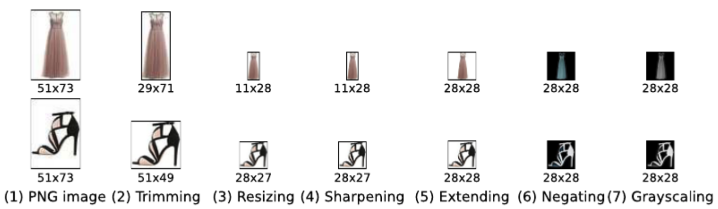

## Introduction to CNN Layers
### CNN Structure 
A classification CNN takes in an input image and outputs a distribution of class scores, from which we can find the most likely class for a given image. As you go through this lesson, you may find it useful to consult this blog post(opens in a new tab), which describes the image classification pipeline and the layers that make up a CNN.

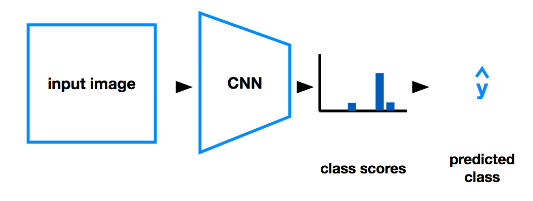

### CNN Layers
The CNN itself is comprised of a number of layers; layers that extract features from input images, reduce the dimensionality of the input, and eventually produce class scores. In this lesson, we'll go over all of these different layers, so that you know how to define and train a complete CNN!

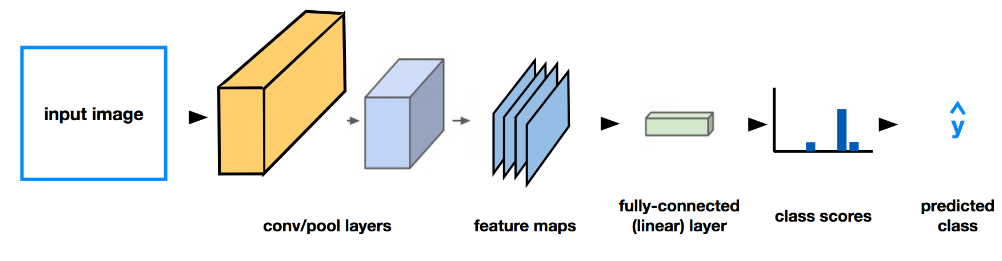

# Convolutional Neural Networks (CNN's)

The type of deep neural network that is most powerful in image processing tasks, such as sorting images into groups, is called a Convolutional Neural Network (CNN). CNN's consist of layers that process visual information. A CNN first takes in an input image and then passes it through these layers. There are a few different types of layers, and we'll start by learning about the most commonly used layers: convolutional, pooling, and fully-connected layers.

First, let's take a look at a complete CNN architecture; below is a network called VGG-16, which has been trained to recognize a variety of image classes. It takes in an image as input, and outputs a predicted class for that image. The various layers are labeled and we'll go over each type of layer in this network in the next series of videos.

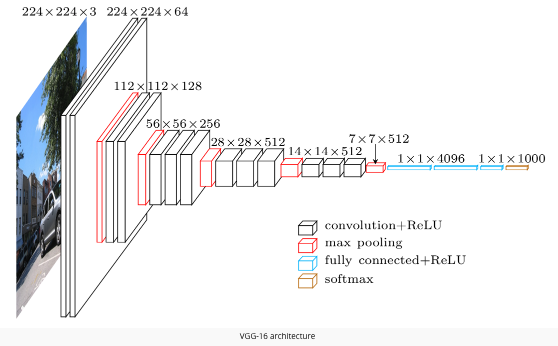


__Convolutional Layer__

The first layer in this network, that processes the input image directly, is a convolutional layer.

* A convolutional layer takes in an image as input.
* A convolutional layer, as its name suggests, is made of a set of convolutional filters.
* Each filter extracts a specific kind of feature, ex. a high-pass filter is often used to detect the edge of an object.
* The output of a given convolutional layer is a set of feature maps (also called activation maps), which are filtered versions of an original input image.


__Activation Function__
You may also note that the diagram reads `"convolution + ReLu,"` and the `ReLu stands for Rectified Linear Unit (ReLU)` activation function. This activation function is zero when the input x <= 0 and then linear with a slope = 1 when x > 0. ReLu's, and other activation functions, are typically placed after a convolutional layer to slightly transform the output so that it's more efficient to perform backpropagation and effectively train the network.



## Define a Network Architecture
The various layers that make up any neural network are documented, here(opens in a new tab). For a convolutional neural network, we'll use a simple series of layers:

* Convolutional layers
* Maxpooling layers
* Fully-connected (linear) layers

* Here, we define a new class Net that inherits from PyTorch's nn.Module. Net is our neural network's class, and by inheriting from nn.Module, we get a lot of functionality from PyTorch to define and train our network.
* `super(Net, self).__init__()` is a special function that helps Python and PyTorch to correctly set up our network.
* `self.conv1` initializes a convolutional layer. The parameters are:
* `in_channels:` The number of input channels (e.g., 3 for RGB images).
* `out_channels:` The number of filters you want your convolutional layer to have.
* `kernel_size:` The size of each filter/kernel (e.g., 3 for a 3x3 filter).
* `stride:` The stride of the convolution.
* `padding:` The amount of padding added to the input.
* `self.pool` is a MaxPooling layer, which reduces the spatial dimensions (height and width) of the input. Parameters include:
* `pool_size:` The size of the window to take a max over.
* `pool_stride:` The stride of the pooling operation.
* `self.fc1` is a fully connected (linear) layer. Parameters include:
* `in_features:` The number of input features (depends on the output size of the last pooling layer).
* `out_features:` The number of output features, which typically corresponds to the number of classes in a classification task.
* In the forward method, we define how the data flows through our network.
* `x = self.pool(F.relu(self.conv1(x)))` applies the first convolutional layer (conv1) to the input x, followed by a ReLU activation function (F.relu), and then applies the pooling layer (pool). This sequence extracts features from the input and reduces its spatial size.
* `x = x.view(x.size(0), -1)` flattens the output from the previous layers to make it suitable for input to the fully connected layer. x.size(0) refers to the batch size, and -1 tells PyTorch to infer the correct dimension to flatten the tensor.
* `x = F.relu(self.fc1(x))` passes the flattened tensor through the fully connected layer (fc1) and then through another ReLU activation function. Finally, the output x is returned. This output can be used for classification or regression tasks, depending on the final layer's configuration.


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_classes):
        super(Net, self).__init__()
        # 1 input image channel (grayscale), 32 output channels/feature maps
        # 5x5 square convolution kernel
        self.conv = nn.Conv2d(1, 32, 5)
        # maxpool layer
        # pool with kernel_size=2, stride=2
        self.pool = nn.MaxPool2d(2,2)

        #Fully-connected layer
        # 32*4 input size to account for the downsampled image size after pooling
        self.fc1 = nn.Linear(32*4, n_classes)


    def forward(self, x):
        # one conv/relu + pool layers
        x = self.pool(F.relu(self.conv1(x)))

        # prep for linear layer by flattening the feature maps into feature vectors 
        x = x.view(x.size(0), -1)

        # linear layer
        x = F.relu(self.fc1(x))

        # final output
        return x


# instantiate and print your net
n_classes = 20
net = Net(n_classes)
print(net)

Net(
  (conv): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=20, bias=True)
)


## Visualizing a Convolutional Layer :

We simply write `self.conv = nn.Conv2d() :` This will take image as an input and give us the multiple number of image filters to find out different patterns in the image

In [ ]:
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline

img_path = 'images/udacity_sdc.png'

bgr_img = cv2.imread(img_path)
gray_img = gray_img.astype('foat32')/255
